In [1]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras import regularizers
from matplotlib import pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns 
import pandas as pd
import shutil
import numpy as np
from sklearn.metrics import precision_recall_fscore_support
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications.mobilenet import preprocess_input
import keras
from matplotlib import pyplot as plt

In [2]:
img_height, img_width = 128, 128
batch_size = 20
train_data_dir = "Dataset2/"
test_data_dir = "Test/"

# Create test directory and move 10% of the data to this directory
if not os.path.exists(test_data_dir):
    os.makedirs(test_data_dir)
    for class_name in os.listdir(train_data_dir):
        class_dir = os.path.join(train_data_dir, class_name)
        test_class_dir = os.path.join(test_data_dir, class_name)
        os.makedirs(test_class_dir)
        files = os.listdir(class_dir)
        n_test = int(len(files) * 0.1)
        test_files = files[:n_test]
        for test_file in test_files:
            src = os.path.join(class_dir, test_file)
            dst = os.path.join(test_class_dir, test_file)
            shutil.move(src, dst)

# Create data generators

train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   validation_split=0.3
                                   )
train_generator = train_datagen.flow_from_directory(train_data_dir,
                                                target_size=(img_height,img_width),
                                                batch_size=batch_size,
                                                class_mode='categorical',
                                                subset='training')
valid_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation')
test_datagen = ImageDataGenerator(rescale=1./255,shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,)
test_generator = test_datagen.flow_from_directory(test_data_dir,
                                                target_size=(img_height,img_width),
                                                batch_size=batch_size,
                                                class_mode='categorical',
                                                
                                                ) 

Found 13333 images belonging to 4 classes.
Found 5711 images belonging to 4 classes.
Found 2114 images belonging to 4 classes.


In [3]:
from keras.layers import Dropout
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[128, 128, 3]),
    keras.layers.Dense(256,activation='relu'),
    keras.layers.BatchNormalization(),
    Dropout(0.2),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.BatchNormalization(),
    Dropout(0.2),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.BatchNormalization(),
    Dropout(0.2),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.BatchNormalization(),
    Dropout(0.2),
    keras.layers.Dense(4, activation='softmax')

])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 49152)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               12583168  
_________________________________________________________________
batch_normalization (BatchNo (None, 256)               1024      
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

In [13]:
patience = 1
stop_patience = 5
factor = 0.5

callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=stop_patience, monitor='val_loss', verbose=1, restore_best_weights=True),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=factor, patience=patience, verbose=1) ]
model.compile(optimizer='Adam',loss="categorical_crossentropy",metrics=['accuracy'])
history=model.fit(train_generator,
                   epochs=30,
                    verbose=1,
                    validation_data=valid_generator)

model.save("demo1/ann2.h5")

Epoch 1/30
667/667 [==============================] - 200s 296ms/step - loss: 1.1274 - accuracy: 0.5545 - val_loss: 0.8585 - val_accuracy: 0.6538
Epoch 2/30
667/667 [==============================] - 171s 257ms/step - loss: 0.9173 - accuracy: 0.6141 - val_loss: 0.8218 - val_accuracy: 0.6505
Epoch 3/30
667/667 [==============================] - 135s 203ms/step - loss: 0.8618 - accuracy: 0.6389 - val_loss: 0.7740 - val_accuracy: 0.6799
Epoch 4/30
667/667 [==============================] - 157s 235ms/step - loss: 0.8366 - accuracy: 0.6506 - val_loss: 1.1001 - val_accuracy: 0.5281
Epoch 5/30
667/667 [==============================] - 189s 283ms/step - loss: 0.8250 - accuracy: 0.6569 - val_loss: 0.8684 - val_accuracy: 0.6391
Epoch 6/30
667/667 [==============================] - 191s 287ms/step - loss: 0.8040 - accuracy: 0.6647 - val_loss: 0.8350 - val_accuracy: 0.6403
Epoch 7/30
667/667 [==============================] - 185s 278ms/step - loss: 0.7967 - accuracy: 0.6718 - val_loss: 0.8549 -

In [19]:
modelAccuracy = model.evaluate(test_generator, verbose=0)
print('Test Accuracy is {}%'.format(modelAccuracy[1] * 100))

Test Accuracy is 77.62535214424133%


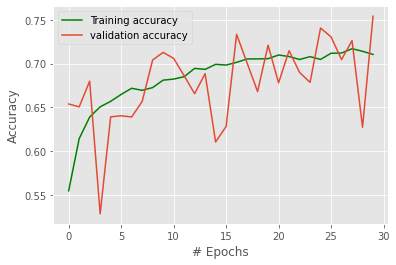

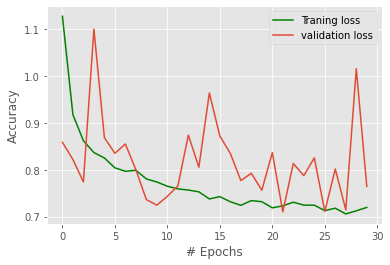

In [15]:
plt.style.use("ggplot")
plt.figure()
plt.plot(history.history['accuracy'],'r',label='Training accuracy',color='green')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig("demo1/ann2_acc.png")
plt.show()


plt.style.use("ggplot")
plt.figure()
plt.plot(history.history['loss'],'r',label='Traning loss',color='green')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig("demo1/ann2_loss.png")
plt.show()

In [16]:
class_names = ['COVID-19','Normal','Viral Pneumonia', 'Lung_Opacity']
y_pred = model.predict(test_generator)
print(class_names[np.argmax(y_pred[2])])

Viral Pneumonia


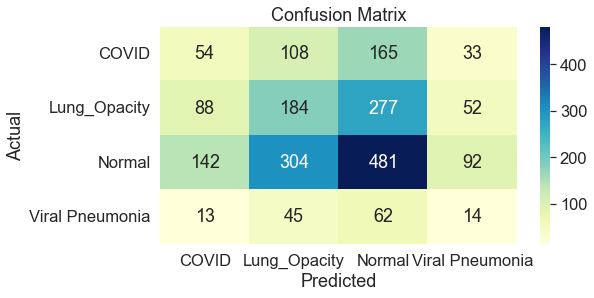

In [17]:
y_pred = model.predict(test_generator) # predict on test_generator

y_pred_classes = np.argmax(y_pred, axis=1) # obtain predicted class labels

conf_mat = confusion_matrix(test_generator.classes, y_pred_classes)

class_names = list(test_generator.class_indices.keys())

conf_mat_df = pd.DataFrame(conf_mat, index=class_names, columns=class_names)

plt.figure(figsize=(8,4))
sns.set(font_scale=1.5, color_codes=True, palette='deep')
sns.heatmap(conf_mat_df, annot=True, fmt='d', cmap="YlGnBu")
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

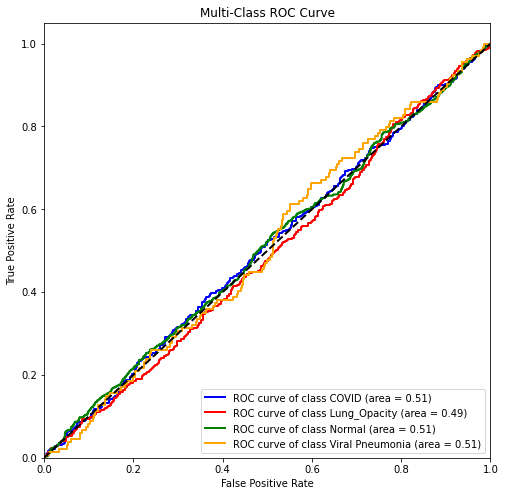

In [15]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
import keras

# Load the saved model
model = keras.models.load_model('demo1/ann2.h5')

class_names = list(test_generator.class_indices.keys())
# Make predictions on the test data
y_pred_proba = model.predict(test_generator)

# Calculate the AUC for each class
lb = LabelBinarizer()
lb.fit(test_generator.classes)
y_true = lb.transform(test_generator.classes)
aucs = []
for i in range(test_generator.num_classes):
    auc = roc_auc_score(y_true[:, i], y_pred_proba[:, i])
    aucs.append(auc)
    
# Plot the ROC curve
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(test_generator.num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_pred_proba[:, i])
    roc_auc[i] = aucs[i]
    
plt.figure(figsize=(8, 8))
colors = ['blue', 'red', 'green', 'orange']
for i, color in zip(range(test_generator.num_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(class_names[i], roc_auc[i]))
    
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [4]:
import tensorflow as tf

model = tf.keras.models.load_model('demo1/ann2.h5')


In [10]:
y_pred = model.predict(valid_generator) # predict on valid_generator

y_pred_classes = np.argmax(y_pred, axis=1)

In [8]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
precision = precision_score(test_generator.classes, y_pred_classes, average='weighted')
recall = recall_score(test_generator.classes, y_pred_classes, average='weighted')
f1 = f1_score(test_generator.classes, y_pred_classes, average='weighted')
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)

Precision: 0.35460510839455356
Recall: 0.3491012298959319
F1 score: 0.3511454397317066


In [11]:
y_pred = model.predict(valid_generator)
y_pred = np.argmax(y_pred, axis=1)

# Get the true labels
y_true = valid_generator.classes

# Calculate precision, recall, and F1-score
precision, recall, f1_score, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted')
print(f'Precision: {precision:.3f}')
print(f'Recall: {recall:.3f}')
print(f'F1-score: {f1_score:.3f}')

Precision: 0.349
Recall: 0.352
F1-score: 0.350


In [12]:
from sklearn.metrics import classification_report

# obtain predicted class probabilities
y_pred = model.predict(test_generator)

# obtain predicted class labels
if y_pred.ndim == 2:
    # if y_pred is 2D, take the argmax along axis 1
    y_pred_classes = np.argmax(y_pred, axis=1)
else:
    # if y_pred is 1D, convert it to a binary array of predicted labels
    y_pred_classes = np.array([1 if p >= 0.5 else 0 for p in y_pred])

# obtain true class labels
y_true = test_generator.classes

# obtain class names
class_names = list(test_generator.class_indices.keys())

# generate classification report
report = classification_report(y_true, y_pred_classes, target_names=class_names)

print(report)

                 precision    recall  f1-score   support

          COVID       0.16      0.12      0.14       360
   Lung_Opacity       0.28      0.30      0.29       601
         Normal       0.46      0.44      0.45      1019
Viral Pneumonia       0.06      0.09      0.07       134

       accuracy                           0.32      2114
      macro avg       0.24      0.24      0.24      2114
   weighted avg       0.33      0.32      0.33      2114

